In [1]:
import numpy as np
import matplotlib.pyplot as plt

with open('../SimulationPrograms/datafiles/deviations/deviation0.deviationdata', 'r', encoding='utf-8') as file:
    lines = file.read().splitlines()
    
location = lines[0]
date = lines[1]
time = lines[2].split(':')
time = time[0]*60+ time[1]

wait = np.array([])
time = np.array([])
latitude = np.array([])
longitude = np.array([])

for i in range(3, len(lines)):
    data = list(map(float, lines[i].split(';')))
    wait = np.append(wait, data[0])
    time = np.append(time, data[1])
    latitude = np.append(latitude, data[2])
    longitude = np.append(longitude, data[3])


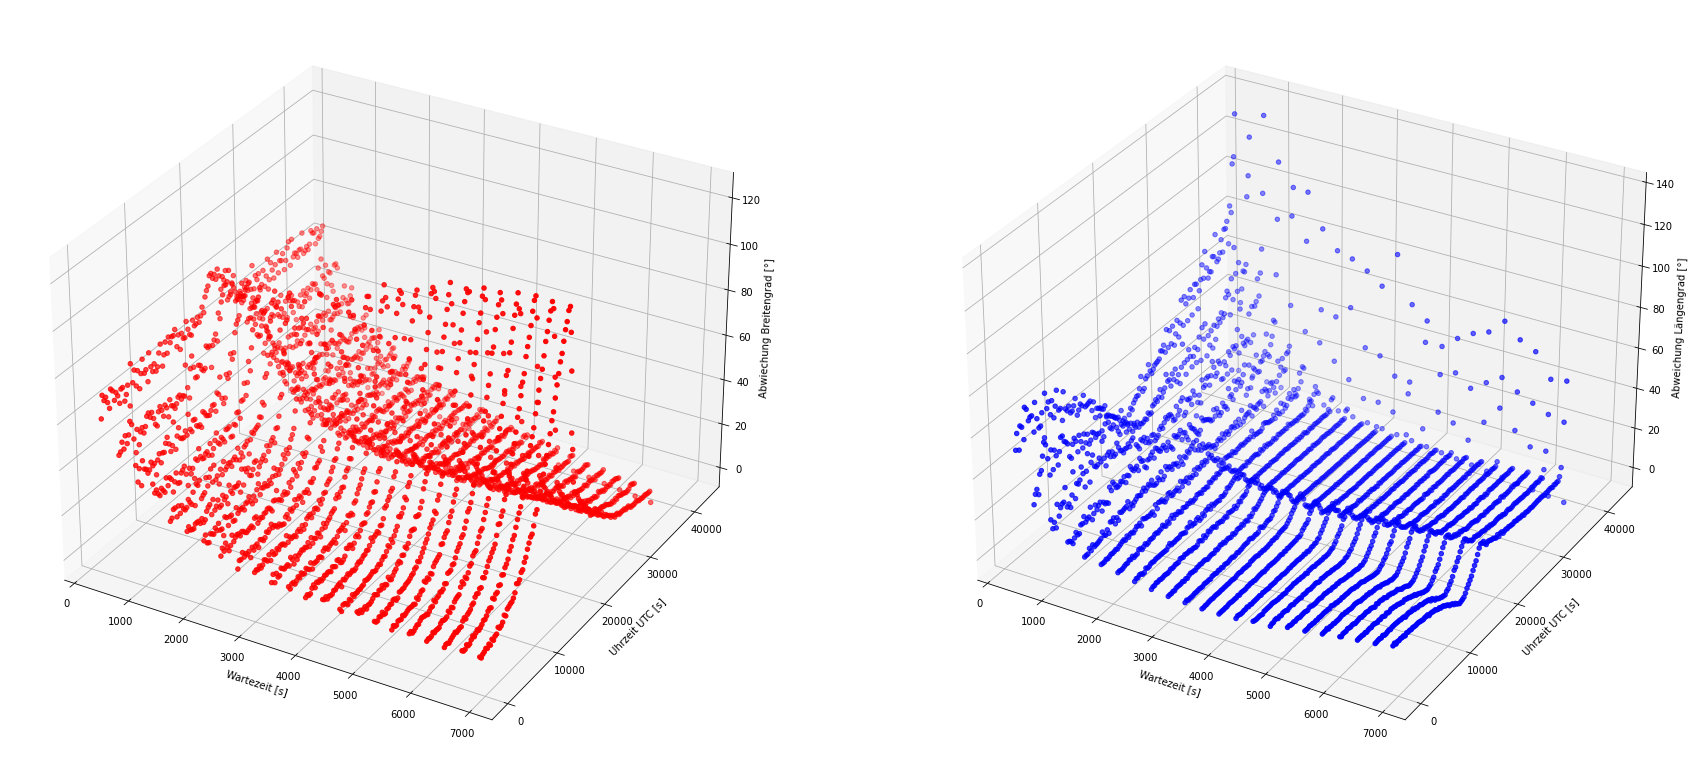

In [3]:
fig = plt.figure(figsize=(30,30))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(wait, time, latitude, c='r', marker='o')

ax.set_xlabel('Wartezeit [s]')
ax.set_ylabel('Uhrzeit UTC [s]')
ax.set_zlabel('Abwiechung Breitengrad [°]')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(wait, time, longitude, c='b', marker='o')

ax.set_xlabel('Wartezeit [s]')
ax.set_ylabel('Uhrzeit UTC [s]')
ax.set_zlabel('Abweichung Längengrad [°]')

plt.show()